#  Example -  Training DQN agent on Minigrid using Wandb

In the previous tutorial, we learned how to use RLHive with chomp logger for the DQN and rainbow agents in the Minigrid environment. 
In this tutorial, we want to work with [Weights & Biases](https://docs.wandb.ai/) (Wandb) as the logger. 

The very first step is to sign up for an account on its website. Then, you need to install it using:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wandb &> /dev/null


Next, you need to import the W&B and log in. To log in, your API key is required which you can find in the setting, API keys section from your account on Wandb site.

In [3]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In RLHive, when you install the package by default Wandb is also installed. However, you still need to use `wandb.login()` for authorization.

In [4]:
## used for updating config.yaml files 
!pip install ruamel.yaml &> /dev/null

!pip install git+https://github.com/chandar-lab/RLHive.git@dev &> /dev/null

## change the gym version, because of breaking changes in gym 0.25
!pip install gym==0.21.0 &> /dev/null
!pip install pygame &> /dev/null
!pip install gym_minigrid==1.0.2 &> /dev/null

In [5]:
## Required imports
import hive
import torch
from hive.agents.dqn import DQNAgent
from hive.runners.utils import load_config
from hive.runners.single_agent_loop import set_up_experiment
from hive.utils.loggers import get_logger
from ruamel import yaml
import os.path
import numpy as np
import os
import sys

<!-- Before we train the agent, first step is to install the environment dependencies.  -->
## Run RLHive using Wandb

Now, we want to run the DQN and Rainbow agents using Wandb. 
To do this, in a config file, the logger should be set to Wandb, for example:


```
loggers:
  -
    name: WandbLogger
    kwargs:
      project: ---
      name: ---
      resume: "allow"
      start_method: "fork"
      mode: online
```
By running that, you will see the log files are saved in the Wandb folder. 

One important feature for Wandb is the possibility to switch between two modes: {online, and offline}. In `online` mode, it will sync data simultaneously to the server while running. However, if you set this to `offline` mode,  Wandb will save your run metadata locally in the Wandb folder and not sync to the server. In this case by using:

`wandb sync [PATH to Wandb folder]`.

 the data will sync to the server. This helps when there is no `HTTP` connection in some machines. You can just run in offline mode and then sync the results to the server. 



# Example one:

Now, let's run `MiniGrid-Empty-5x5-v0` for the DQN agent  with the Wandb logger. Other config settings are the same as in the previous tutorial.

Here, we consider `5` different random seeds to show the results.

The Wandb logs for each random seed will be saved in a folder corresponding to each Wandb run. 

In [6]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [ ]:
# Training the DQN Agent
%%script bash
hive_seeds=(0 1 2 3 4)
for hive_seed in ${hive_seeds[@]}
do
  hive_single_agent_loop --config  minigrid5_dqn.yml --seed $hive_seed --run_name "minigrid-empty-5x5-image-dqn-$hive_seed" --train_steps 70000 --agent.hidden_units [256, 256] --save_dir '/content/drive/MyDrive/experiment/minigrid5*5_dqn'
done 

In [ ]:
# Training the DQN Agent
hive_seeds=(0 1 2 3 4)
for hive_seed in range(5):
  !hive_single_agent_loop --config  minigrid5_dqn.yml --seed $hive_seed --run_name "minigrid-empty-5x5-image-dqn-{hive_seed}" --train_steps 70000 --agent.hidden_units [256, 256] --save_dir '/content/drive/MyDrive/experiment/minigrid5*5_dqn_21'
 

For the plots,  we do not need to call the `visualization` function from RLHive, since Wandb makes the plots. You can change the x-axis and y-axis based on what you want the plots to show. For example, as shown below you can select the reward for test time as the y-axis.



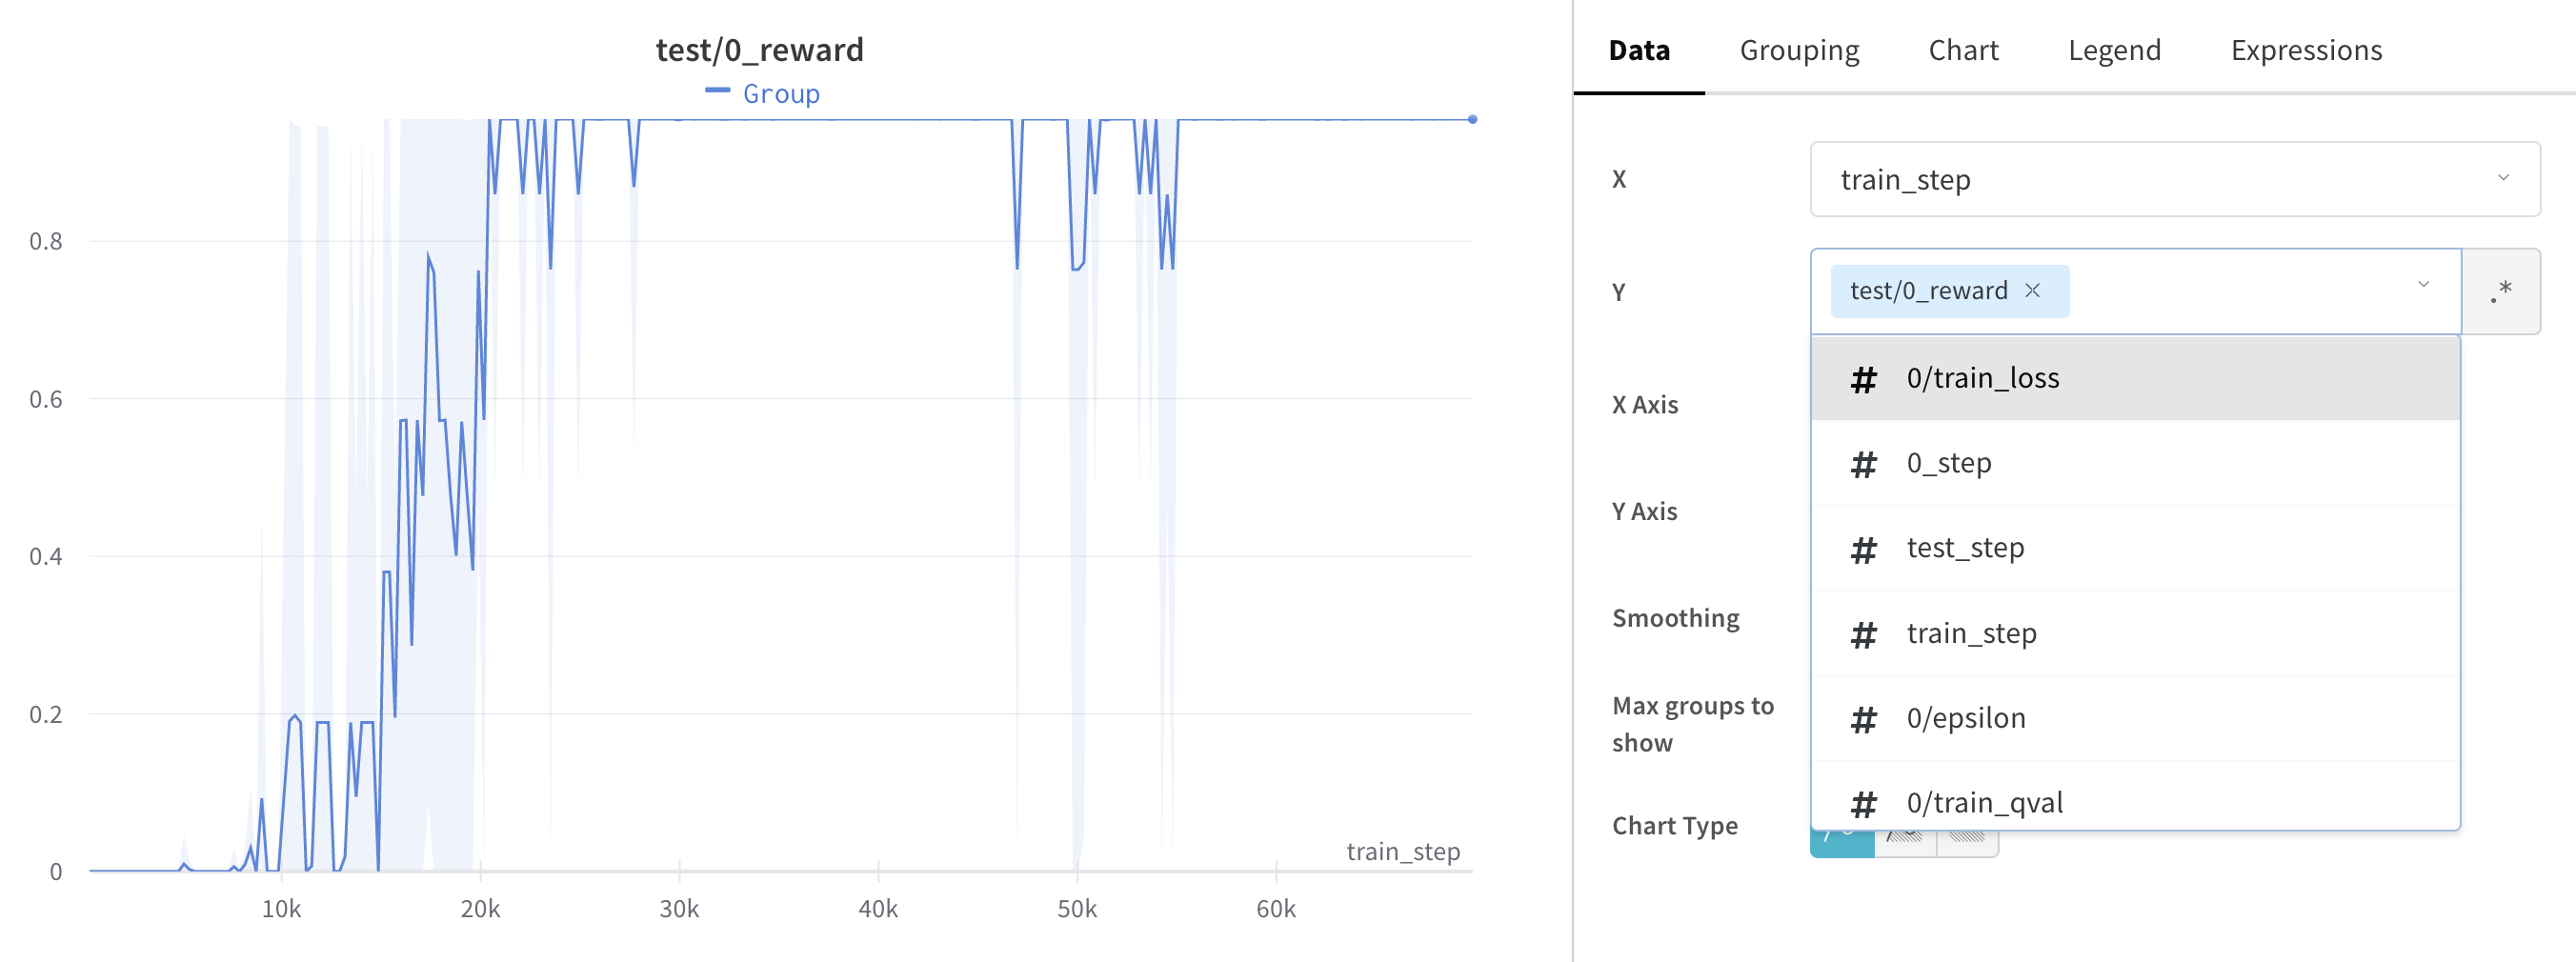

Here, you can see the plots for both reward and episode length from Wandb:

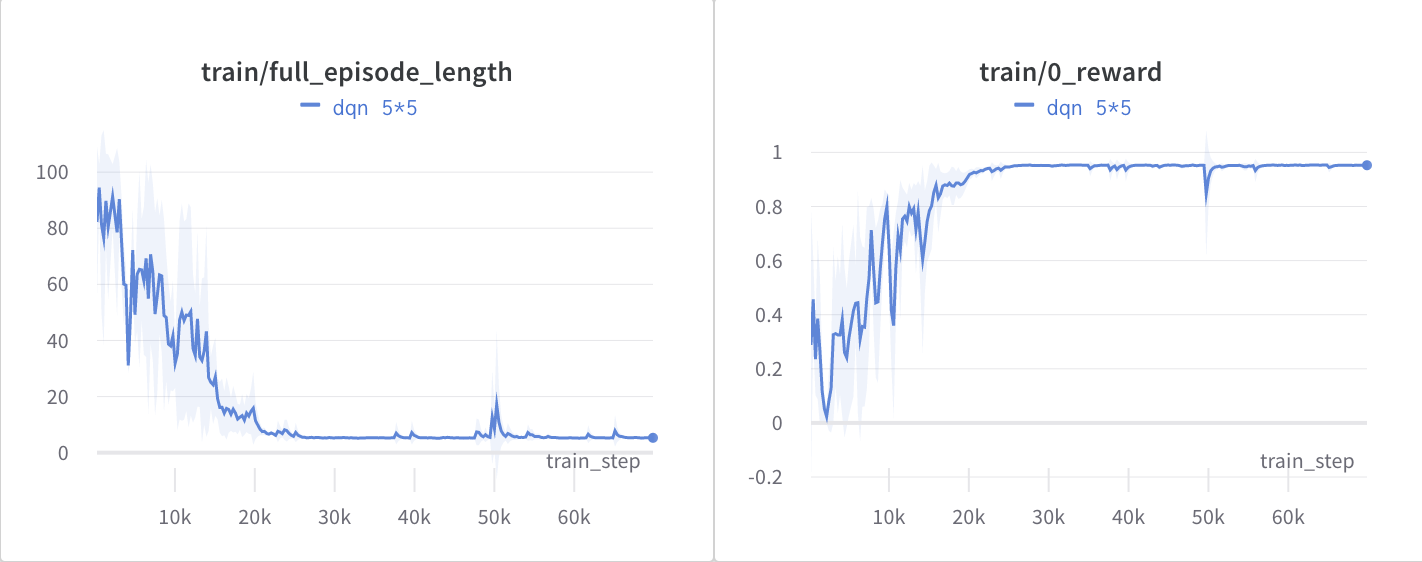

# Example Two:
Now, let's try the `MiniGrid-Empty-16x16-v0` environment with the Wandb logger.
We run the same DQN agent as above with `5` different random seeds to show the average results. 


In [ ]:
# Training the DQN Agent
%%script bash
hive_seeds=(0 1 2 3 4)
for hive_seed in ${hive_seeds[@]}
do
  hive_single_agent_loop --config  minigrid16_dqn.yml --seed $hive_seed --run_name "minigrid-empty-16x16-image-dqn-$hive_seed" --train_steps 100000 --agent.hidden_units [256, 256] --save_dir '/content/drive/MyDrive/experiment/minigrid16*16_dqn_21'
done 

The results for this environment is the following:

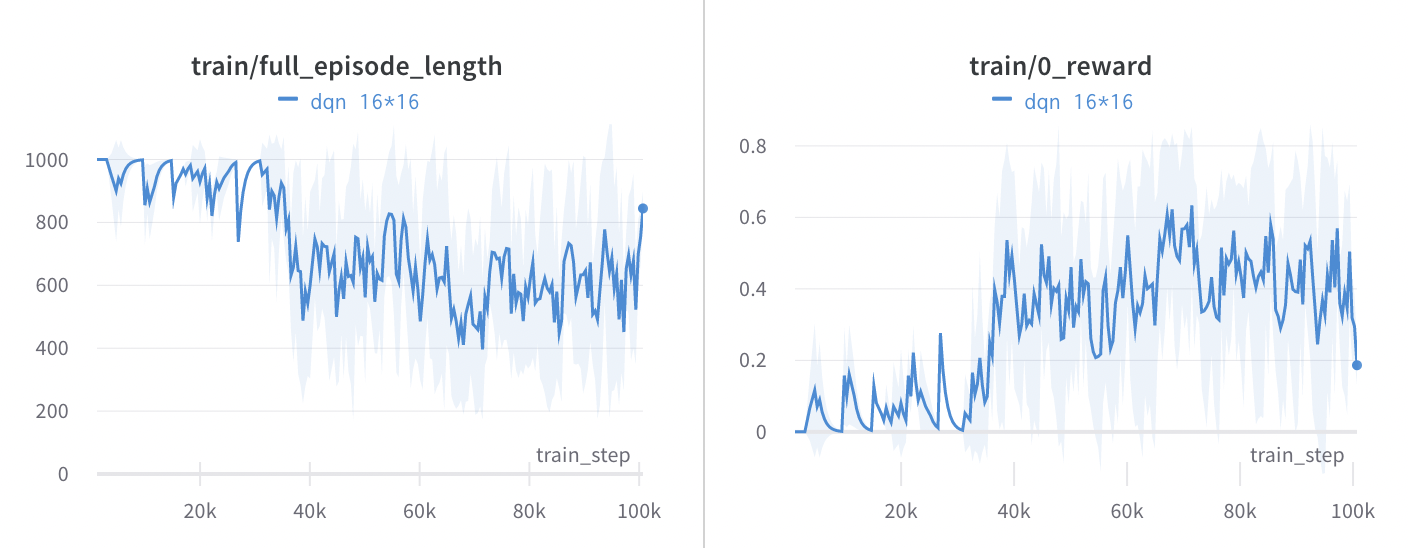

Now here if you want to compare two different plots, you can just simply add that run set to this run set by the `Add run set` button like below and then have both plots together in the same figure: 


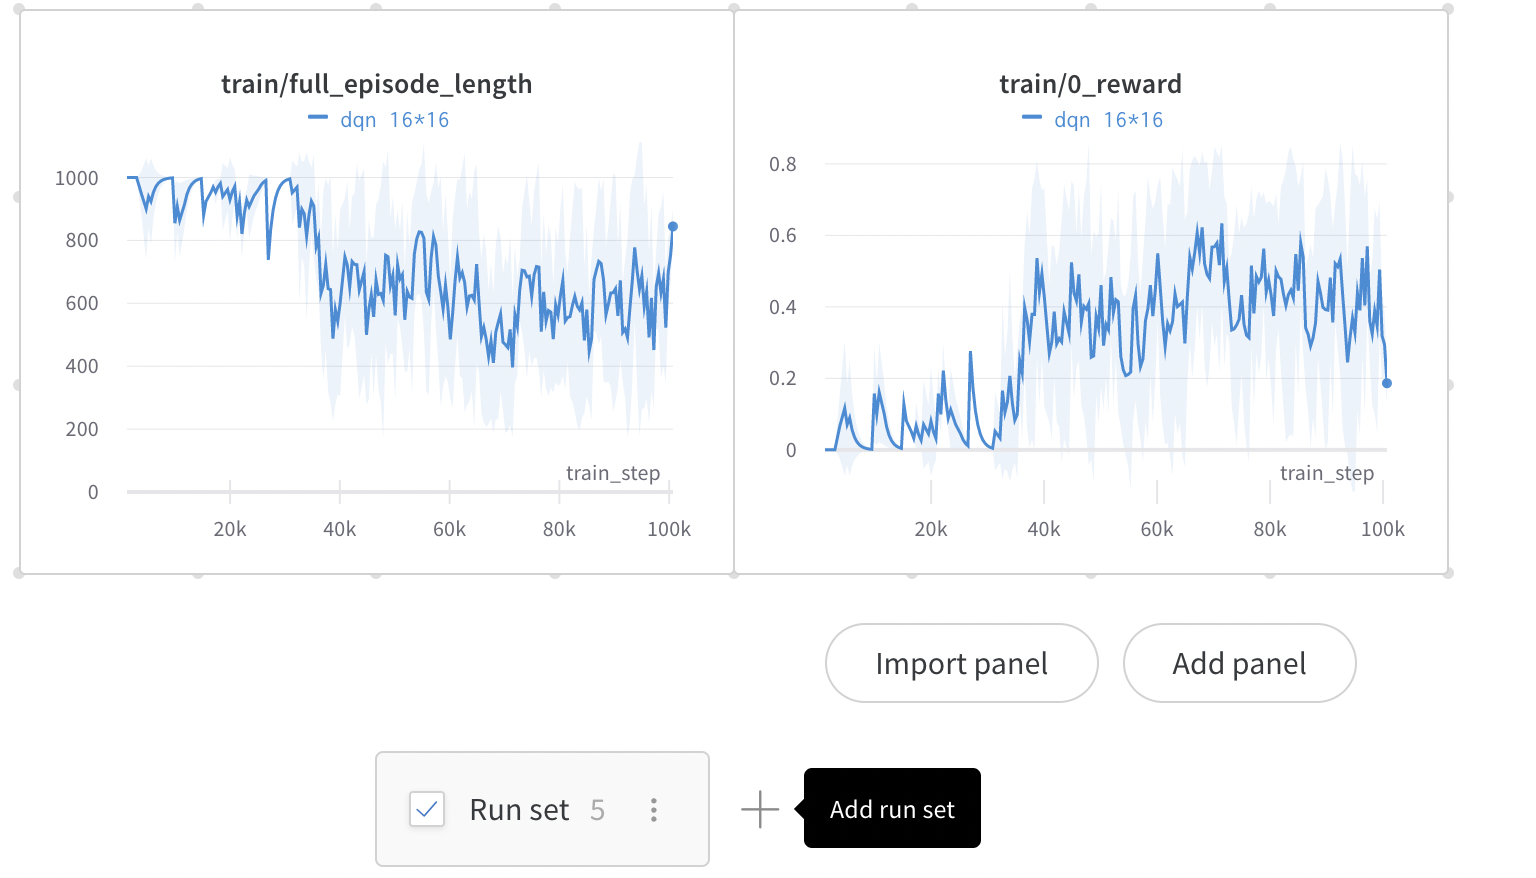

Here, you can see both plots to compare them together: 

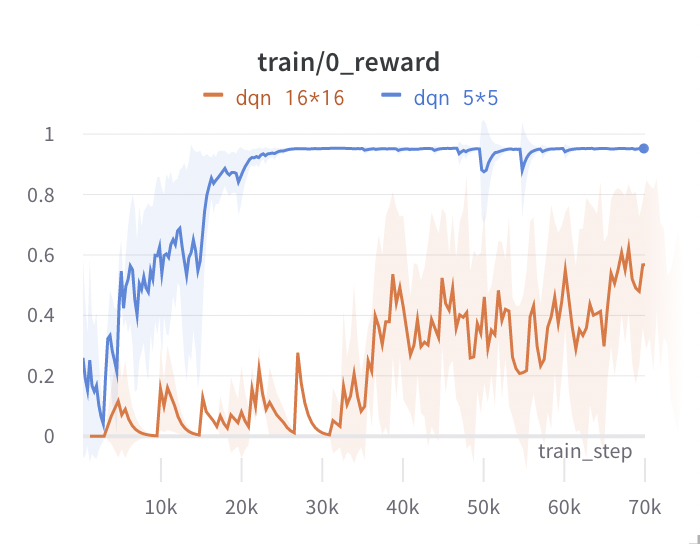

# Rainbow agent:

Now, we can run rainbow agent also with Wandb logger. The following code runs a Rainbow agent with the same setting as the DQN agent for `MiniGrid-Empty-16x16-v0` for `100K` steps. 

In [ ]:
# Training the rainbow Agent
%%shell
hive_seeds=(0 1 2 3 4)
for hive_seed in ${hive_seeds[@]}
do
  echo $hive_seed
  hive_single_agent_loop --config  minigrid16_rainbow.yml --seed $hive_seed --run_name "minigrid-empty-16x16-image-rainbow-$hive_seed" --train_steps 100000 --save_dir '/content/drive/MyDrive/experiment/minigrid16*16_rainbow_100k'
done 

Here, you can see the plots for reward and episode length. 


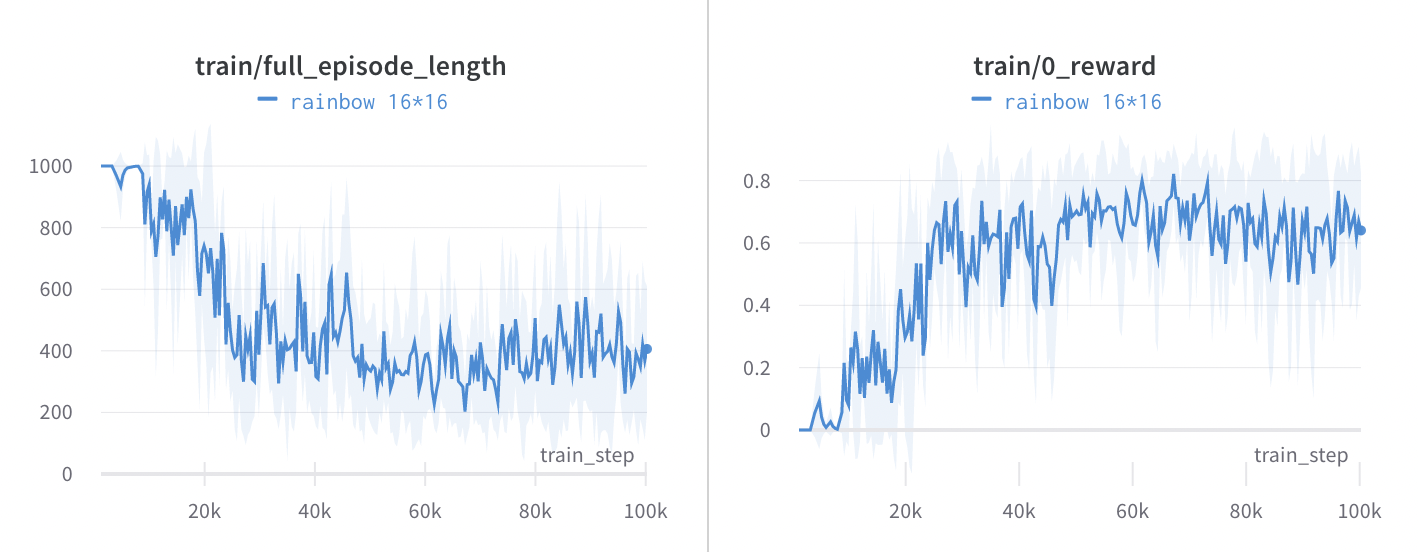

If you want to compare DQN and Rainbow agents again, you can put them in the same plot, like here:

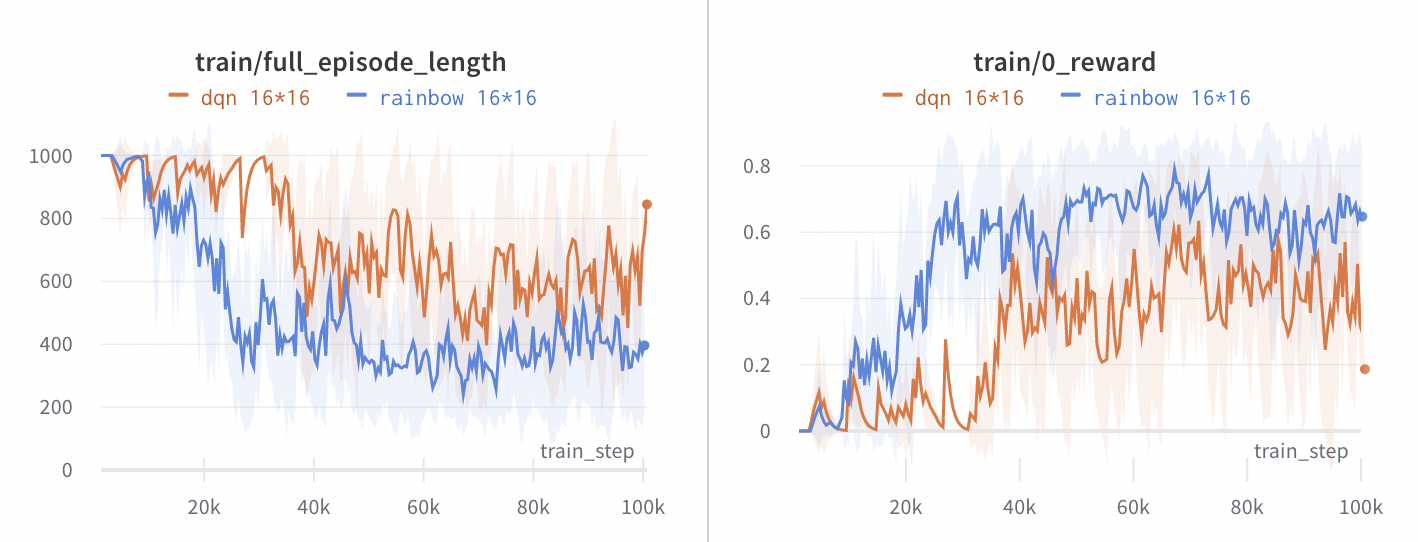

In this tutorial, we used the Wandb logger for the DQN and Rainbow agents. As you saw here, working with Wandb is easier than the chomp logger. Also, you have a backup of your data on the Wandb server for your future usages.
 